- Importing the File
- Importing the Data Description to get the matabolism position and names. 
- Zooming to the metabolism position and find the peaks there, for every measurement step
- Plotting the Peaks and make interpolation
- Plotly configureation: manually set range

## Classes

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import polars as pl 

# script classes
from classes import *


In [2]:
loaddata = LoadData()

peakfinder = PeakFinder()


In [3]:
# FA_20240517_2H_yeast_Nicotinamide-d4 _9.csv
# FA_20231123_2H Yeast_Fumarate-d2_12 .csv
# FA_20240406_2H_Gluc-d2_50mM+Pyruvate_400mM_5.ser.csv

file = str(Path('FA_20231123_2H Yeast_Fumarate-d2_12 .csv'))
substrates = loaddata.get_substrate_list(file)
metabolites = loaddata.get_metabolite_list(file)
df_list = loaddata.load_data(file)

# geht nicht
# FA__20240205_2H_yeast_Acetone-d6_3.csv

Here are the x positions we have to look for peaks!

In [4]:
substrates, metabolites

([6.653, np.float64(4.7)], [4.368, 2.474])

Zooming to the substrat and metabolism positions

In [5]:
df = pd.read_csv(df_list[0])
display(df.head())


def zoom(df, pos, width=0.5):

    start = pos - width
    end = pos + width
    df_zoom = df[(df.iloc[:, 0] >= start) & (df.iloc[:, 0] <= end)]
    return df_zoom
    
def get_peak_list(df, substrat, range=0.1):
    
    peak_list = []
    peak_df = pd.DataFrame()
    df_zoom = zoom(df, substrat, range).reset_index(drop=True)

    for col in df.columns[1:]:

        x = df_zoom.iloc[:, 0]
        y = df_zoom.loc[:, col]

        peaks, prob, tresh = peakfinder.peaks_finder(y)

        peaks = {'x': x[peaks].values, 
                'y': y[peaks].values}

        peak_df = pd.concat([peak_df, pd.DataFrame(peaks)], ignore_index=True)
        
    return peak_df

    

2H chemical shift (ppm)  FA_20231123_2H_yeast_1.12.ser#1  \
0                 0.175438                          235.589   
1                 0.179511                          266.250   
2                 0.183583                          287.465   
3                 0.187656                          298.346   
4                 0.191728                          299.468   

   FA_20231123_2H_yeast_1.12.ser#2  FA_20231123_2H_yeast_1.12.ser#3  \
0                         -142.421                          186.824   
1                         -146.333                          184.410   
2                         -151.628                          177.984   
3                         -156.104                          170.049   
4                         -158.213                          161.835   

   FA_20231123_2H_yeast_1.12.ser#4  FA_20231123_2H_yeast_1.12.ser#5  \
0                         -240.664                         101.4070   
1                         -265.380                          92.9464   
2                         -292.162                          76.7626   
3                         -318.859                          55.1317   
4                         -344.944                          32.2881   

   FA_20231123_2H_yeast_1.12.ser#6  FA_20231123_2H_yeast_1.12.ser#7  \
0                         -8.01266                          159.296   
1                         -8.89097                          154.005   
2                         -5.28661                          149.525   
3                          3.30199                          146.694   
4                         16.28240                          144.705   

   FA_20231123_2H_yeast_1.12.ser#8  FA_20231123_2H_yeast_1.12.ser#9  ...  \
0                         -187.514                          165.162  ...   
1                         -184.499                          180.289  ...   
2                         -178.643                          189.246  ...   
3                         -172.008                          192.890  ...   
4                         -167.424                          191.941  ...   

   FA_20231123_2H_yeast_1.12.ser#121  FA_20231123_2H_yeast_1.12.ser#122  \
0                            53.0116                           -46.6442   
1                            58.6428                           -31.0491   
2                            63.5828                           -21.1424   
3                            66.1474                           -17.2747   
4                            64.2933                           -19.6555   

   FA_20231123_2H_yeast_1.12.ser#123  FA_20231123_2H_yeast_1.12.ser#124  \
0                           103.9240                           -117.352   
1                            94.7768                           -127.025   
2                            87.7683                           -140.062   
3                            82.0078                           -155.382   
4                            76.0027                           -173.026   

   FA_20231123_2H_yeast_1.12.ser#125  FA_20231123_2H_yeast_1.12.ser#126  \
0                           -45.1414                           -437.214   
1                           -55.0382                           -452.019   
2                           -57.0350                           -461.355   
3                           -52.0373                           -463.018   
4                           -43.0591                           -454.824   

   FA_20231123_2H_yeast_1.12.ser#127  FA_20231123_2H_yeast_1.12.ser#128  \
0                           141.5880                           -72.3242   
1                           117.3740                           -65.3244   
2                            89.7262                           -57.2291   
3                            58.5268                           -47.1451   
4                            25.0871                           -34.5943   

   FA_20231123_2H_yeast_1.12.ser#129  FA_20231123_2H_yeast_1.12.ser#130  
0       

In [6]:
import plotly.express as px
import polars as pl
import numpy as np

def plot_picture(df, substrates, metabolites):
    pic = df.iloc[:, 1:].to_numpy()
    pic = np.transpose(pic)
    
    # flip the picture upside down
    pic = np.flipud(pic)

    # Extract x-axis labels from the first column of the DataFrame
    x_labels = df.iloc[:, 0].to_numpy()

    # extract y-axis labels from the column names of the DataFrame
    y_labels = df.iloc[:, 1:].columns 
    
    # reorder the y-axis labels last to first
    y_labels = y_labels[::-1]


    # Create the heatmap with the specified x-axis labels
    fig = px.imshow(
        pic,
        aspect='auto',
        labels=dict(x="Spectrum", y="Time", color="Intensity"),
        x=x_labels,  # Set the x-axis labels
        y=y_labels,  # Set the y-axis labels 
        # color
        color_continuous_scale='Spectral_r',
    )

    fig.show()

# Assuming df, substrates, and metabolites are defined
plot_picture(df, substrates=substrates, metabolites=metabolites)


## Plot Metabolite 

metabolites: 4.368


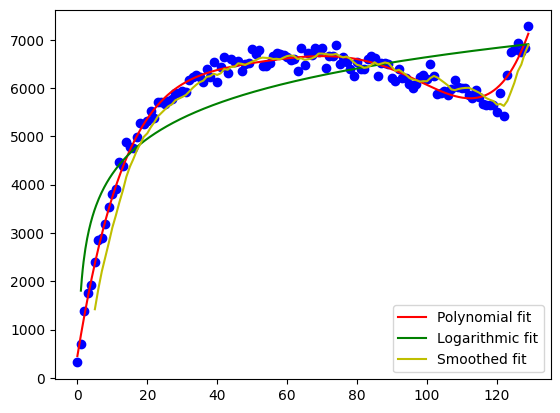

metabolites: 2.474


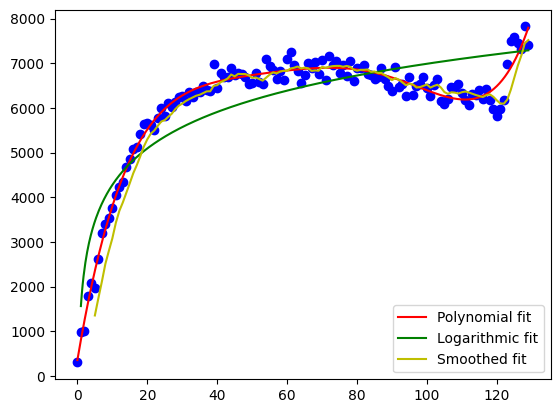

In [7]:
def outlier_detection(x, y, threshold=2):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    mask = (y >= lower_bound) & (y <= upper_bound)
    return x[mask], y[mask]


# Polynomial Regression
def polynomial_regression(x, y, degree=16):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    x_new = np.linspace(x.min(), x.max(), 500)
    y_regression = polynomial(x_new)


    

    return x_new, y_regression

# Logarithmic Regression
def logarithmic_regression(x, y):
    # Filter out non-positive x values
    valid_indices = x > 0  # Only keep positive x values for the log transformation
    x = x[valid_indices]
    y = y[valid_indices]
    x_new = np.linspace(x.min(), x.max(), 500)
    # Apply logarithmic transformation to x for the logarithmic regression
    log_x = np.log(x)
    # Fit a linear model to log(x) vs y
    coefficients = np.polyfit(log_x, y, 1)  # Degree 1 for a linear fit in log space
    logarithmic_fit = np.poly1d(coefficients)
    y_log = logarithmic_fit(np.log(x_new))



    return x_new, y_log

def window_smooth(x, y, window_size=6):
    
    # rolling window
    y_smooth = y.rolling(window_size).mean()
    x_new = x

    return x_new, y_smooth





for metabolite in range(len(metabolites)):
    metabolite_peak =get_peak_list(df, substrat=metabolites[metabolite], range=0.05).dropna()
    print(f'metabolites: {metabolites[metabolite]}')

    # Define the data points
    x = metabolite_peak.index
    y = metabolite_peak['y']

    # Remove outliers
    #x, y = outlier_detection(x, y)

    x_poly, y_poly = polynomial_regression(x, y, degree=6)
    x_log, y_log = logarithmic_regression(x, y)
    x_smooth, y_smooth = window_smooth(x, y)

    # Plot the original data points and the regression line
    plt.plot(x, y, 'bo')           # Original data points
    plt.plot(x_poly, y_poly, 'r-', label=f'Polynomial fit')  # Regression line
    plt.plot(x_log, y_log, 'g-', label='Logarithmic fit')  # Regression line in original space
    plt.plot(x_smooth, y_smooth, 'y-', label='Smoothed fit')  # Regression line in original space
    plt.legend()
    plt.show()


substrate: 6.653


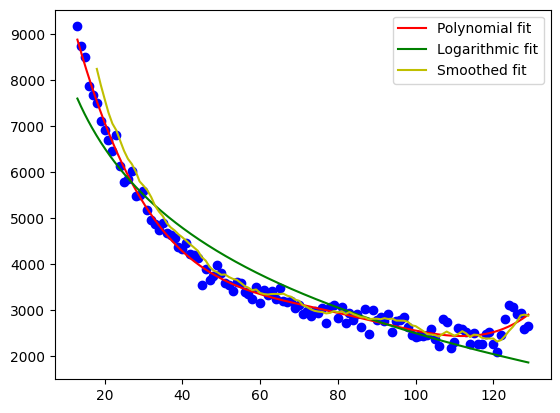

substrate: 4.7


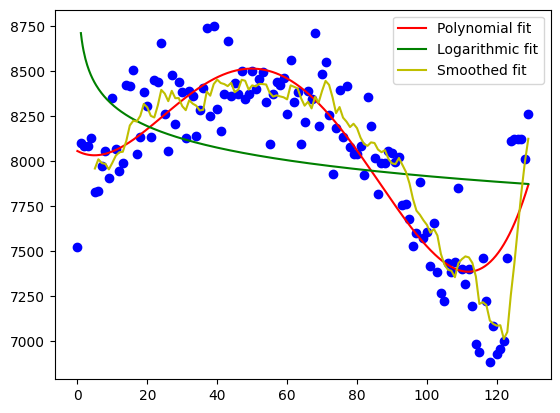

In [8]:
#peak_df = get_peak_list(df, substrat=substrates[1], range=0.1).dropna()

for substrate in range(len(substrates)):
    substrate_peak =get_peak_list(df, substrat=substrates[substrate], range=0.05).dropna()
    print(f'substrate: {substrates[substrate]}')

    # Define the data points
    x = substrate_peak.index
    y = substrate_peak['y']

    # Remove outliers
    x, y = outlier_detection(x, y)

    x_poly, y_poly = polynomial_regression(x, y, degree=4)
    x_log, y_log = logarithmic_regression(x, y)
    x_smooth, y_smooth = window_smooth(x, y)

    # Plot the original data points and the regression line
    plt.plot(x, y, 'bo')           # Original data points
    plt.plot(x_poly, y_poly, 'r-', label=f'Polynomial fit')  # Regression line
    plt.plot(x_log, y_log, 'g-', label='Logarithmic fit')  # Regression line in original space
    plt.plot(x_smooth, y_smooth, 'y-', label='Smoothed fit')  # Regression line in original space
    plt.legend()
    plt.show()